Primeras filas:
                           name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   Third Owner   17.7 kmpl  1497 CC      78 bhp   
3  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
4  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   

                     torque  seats  
0            190Nm@ 2000rpm    5.

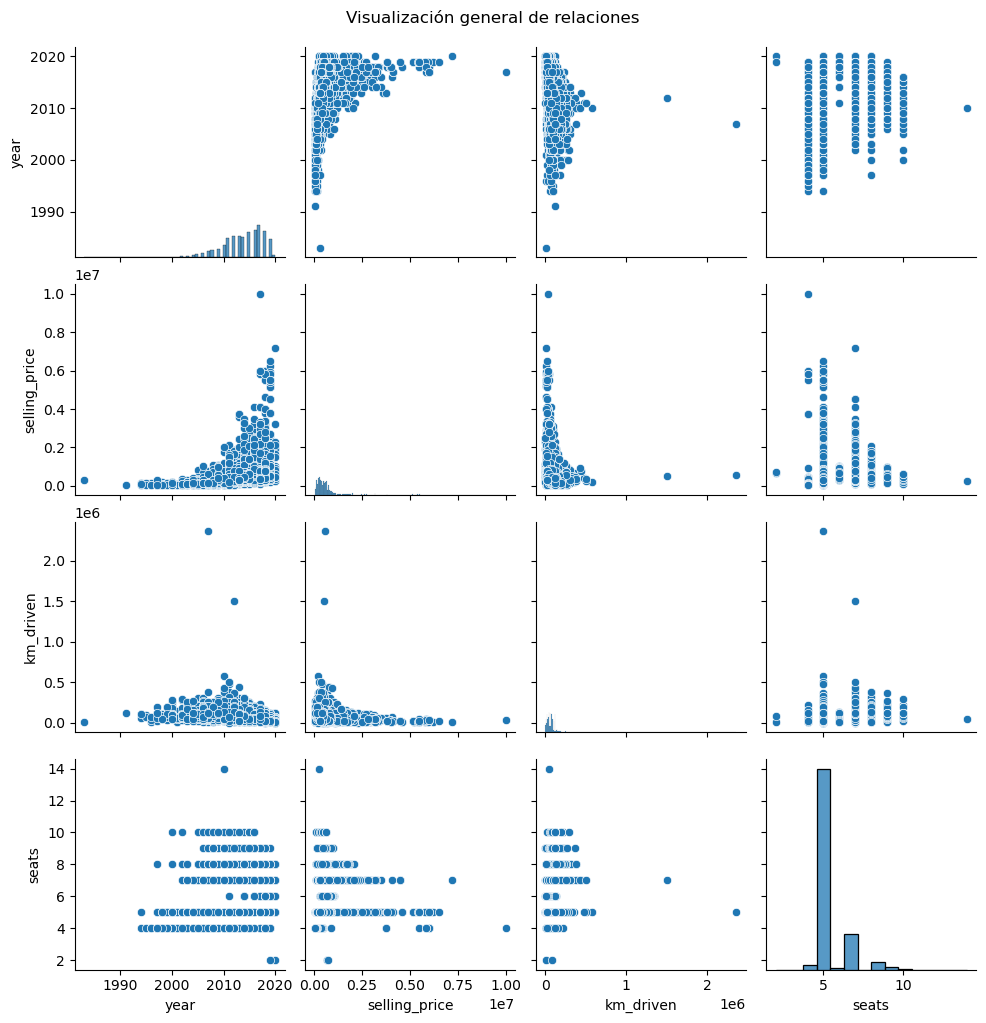

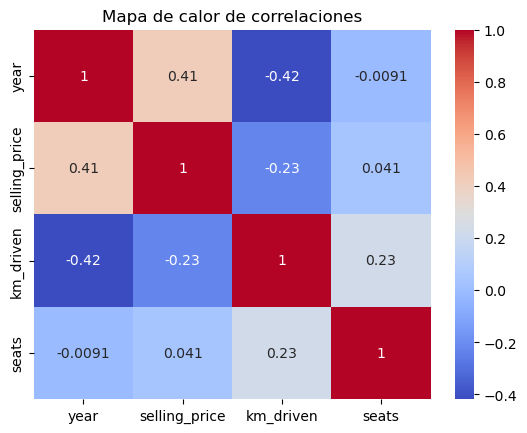


R2 Score: 0.4300
RMSE: 353665.63


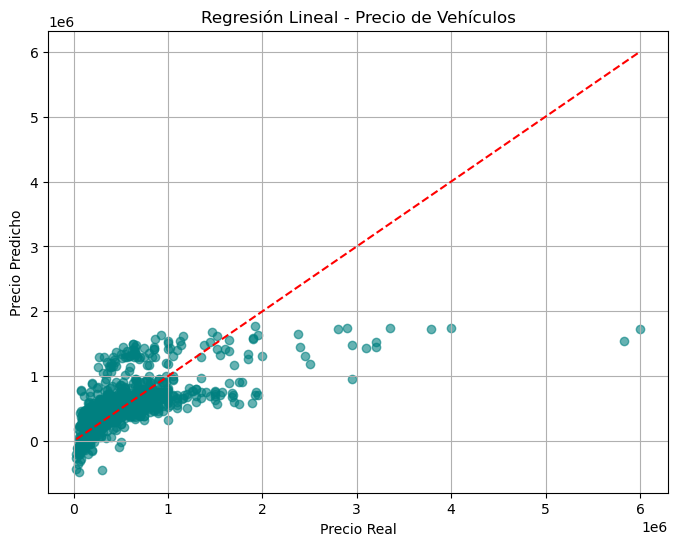

In [2]:
# --- Importar librerías ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# --- Cargar dataset ---
ruta = r"C:\Users\SM ZONA GAMER\Documents\UNAD\Quinto semestre\Otros\Analisis de datos\analisis de datos marilú\ruta vehicles\Car details v3.csv "  # Cambia esta ruta por la tuya
df = pd.read_csv(ruta)

# --- Análisis exploratorio ---
print("Primeras filas:")
print(df.head())

print("\nInformación general:")
print(df.info())

print("\nEstadísticas descriptivas:")
print(df.describe())

# --- Gráfico pairplot y correlaciones ---
sns.pairplot(df)
plt.suptitle("Visualización general de relaciones", y=1.02)
plt.show()

sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Mapa de calor de correlaciones")
plt.show()

# --- Preprocesamiento ---
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

# Codificar columnas categóricas
le = LabelEncoder()
df['fuel'] = le.fit_transform(df['fuel'])
df['seller_type'] = le.fit_transform(df['seller_type'])
df['transmission'] = le.fit_transform(df['transmission'])
df['owner'] = le.fit_transform(df['owner'])

# Selección de características (puedes ajustar si lo deseas)
X = df[['year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner']]
y = df['selling_price']

# División del dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamiento del modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Predicción
y_pred = modelo.predict(X_test)

# Evaluación
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"\nR2 Score: {r2:.4f}")
print(f"RMSE: {rmse:.2f}")

# Gráfico real vs predicho
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Precio Real")
plt.ylabel("Precio Predicho")
plt.title("Regresión Lineal - Precio de Vehículos")
plt.grid(True)
plt.show()
